# Plot n-dimensional distributions

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import proplot as pplt
import psdist as ps
import psdist.visualization as psv

import mentflow as mf

In [2]:
pplt.rc["cmap.discrete"] = False
pplt.rc["cmap.sequential"] = "viridis"
pplt.rc["figure.facecolor"] = "white"
pplt.rc["grid"] = False

In [3]:
ndim = 6
size = 1_000_000
normalize = True
n_bins = 80
rmax = 4.0
seed = 0
noise = None

names = [
    # "gaussian",
    # "gaussian_mixture",
    # "hollow",
    # "kv",
    "rings",
    # "waterbag",
]

rings


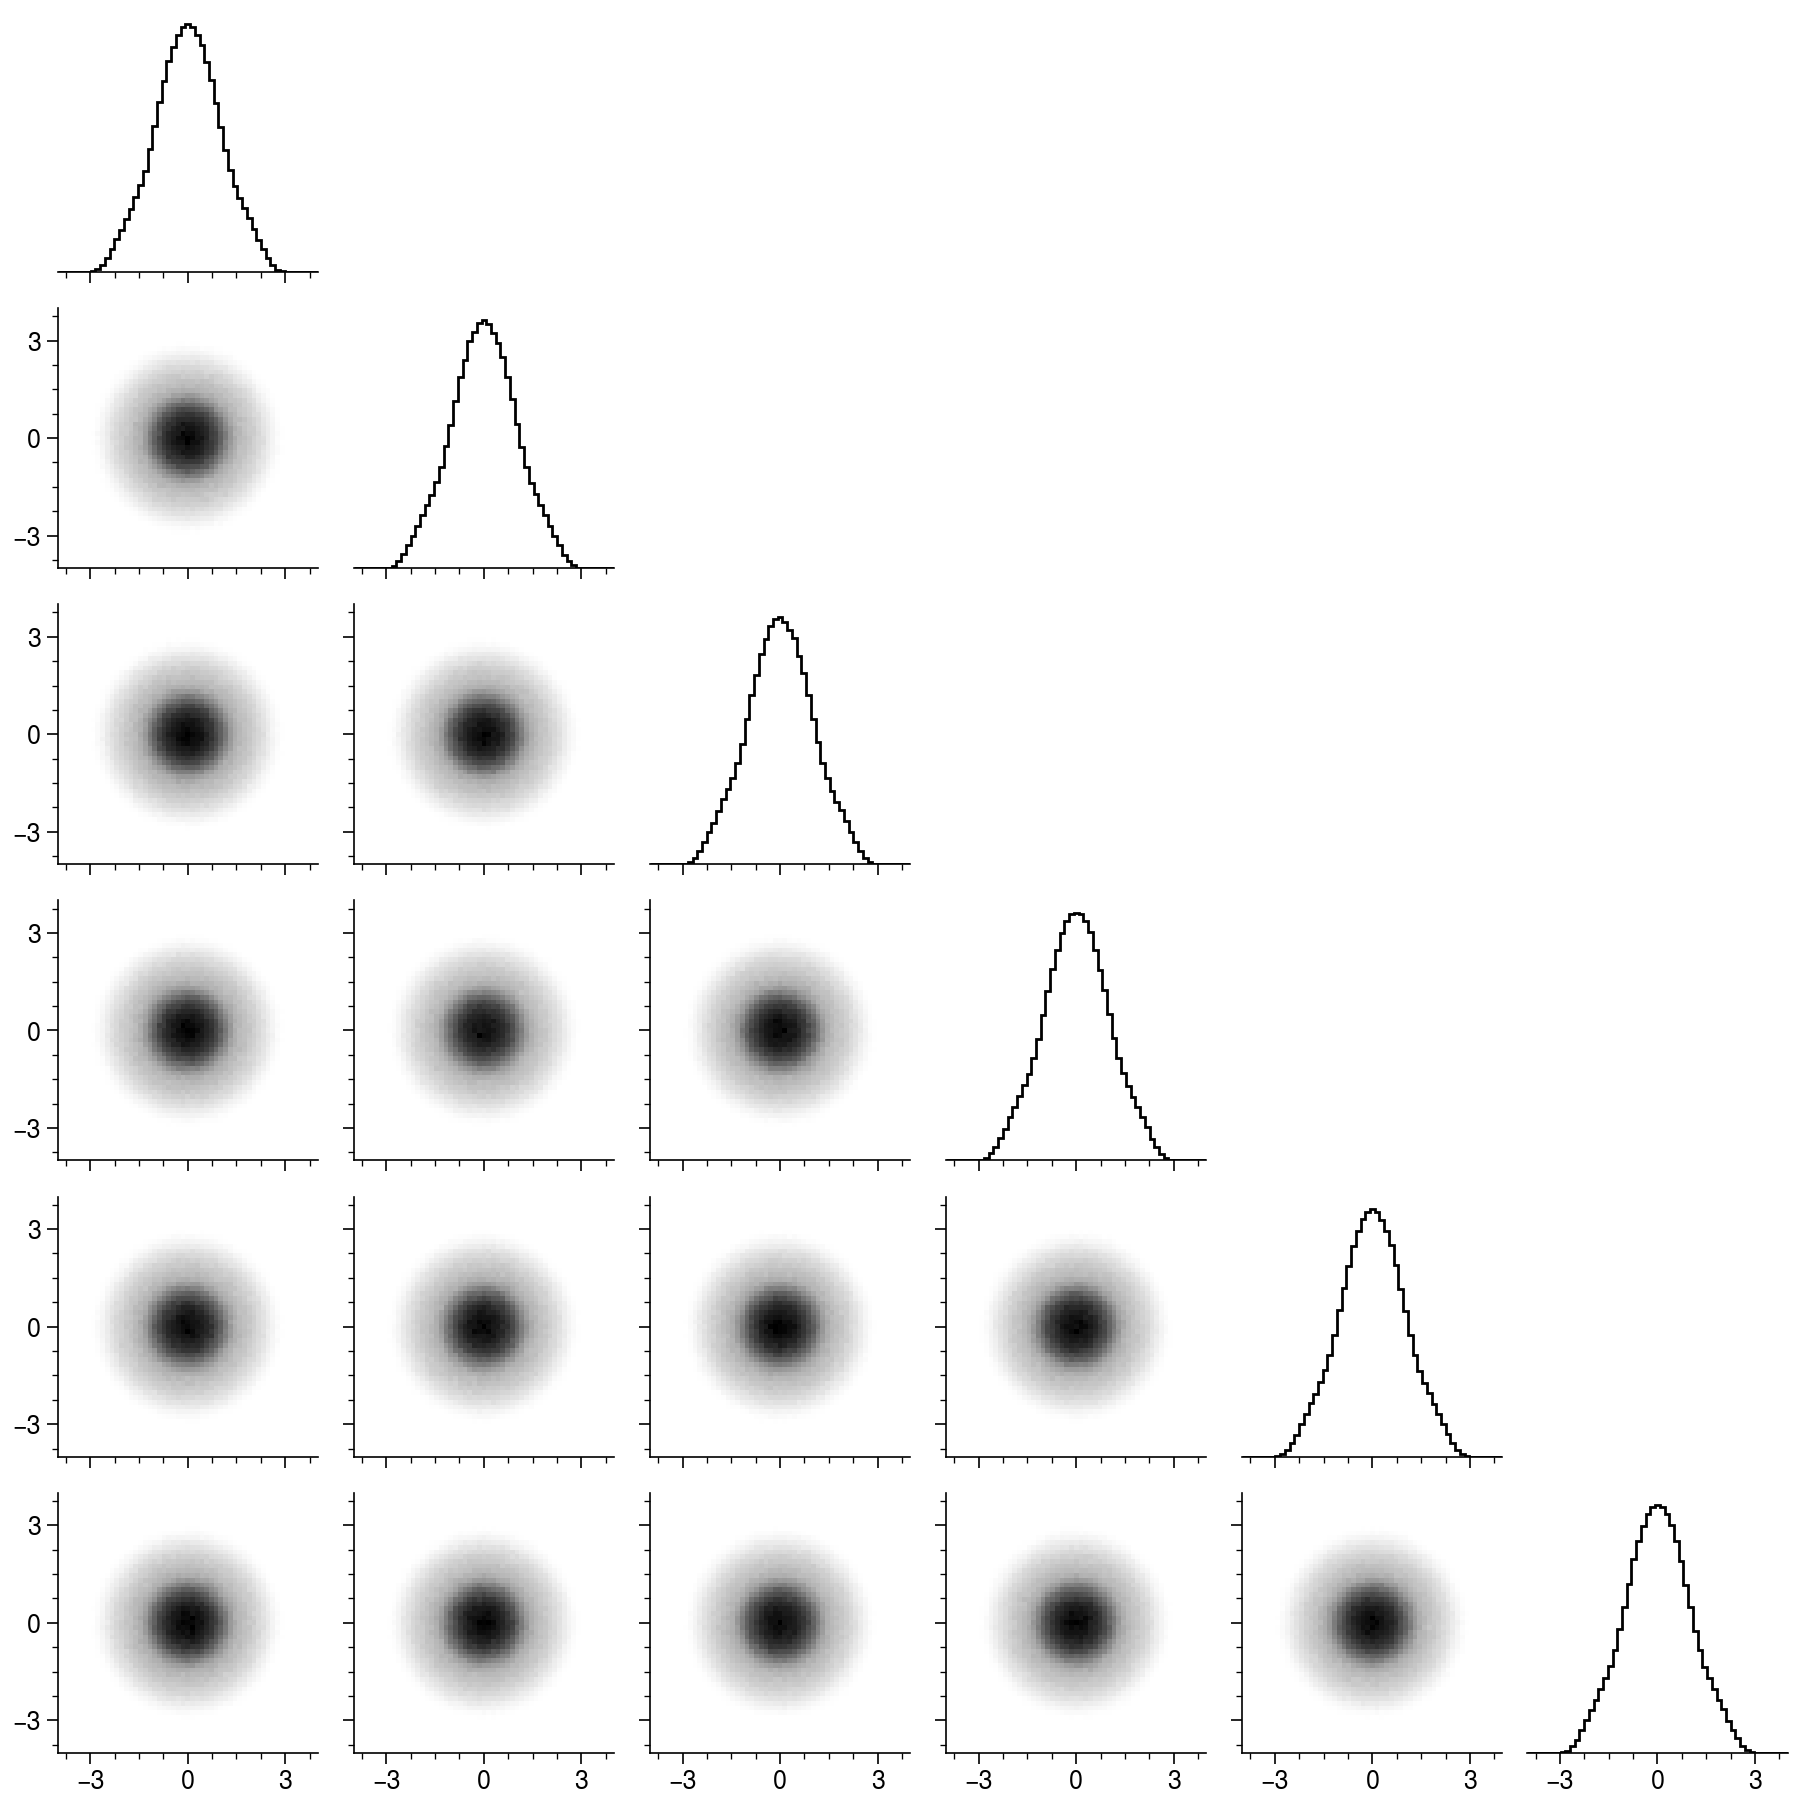

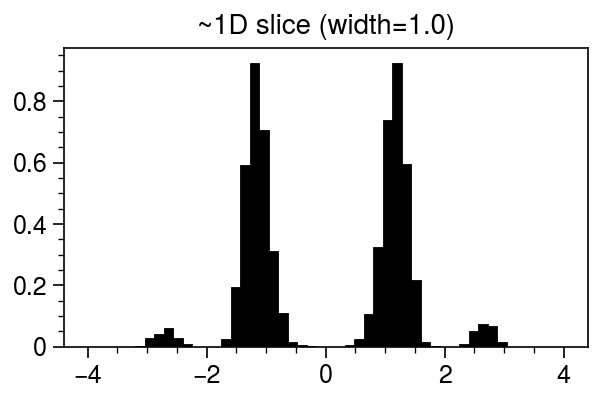

In [10]:
limits= ndim * [(-rmax, rmax)]

for name in names:
    print(name)   
    
    dist = mf.distributions.get_distribution(
        name, ndim=ndim, seed=seed, normalize=normalize, noise=noise,
        decay=0.075,
    )
    x = dist.sample(size)
    x = mf.utils.grab(x)
            
    grid = psv.CornerGrid(ndim, diag_rspine=False)
    grid.plot_points(x, limits=limits, bins=55, mask=False, cmap="mono")
    pplt.show()

    slice_width = 1.0
    x_slice = ps.points.slice_planar(
        x, 
        axis=list(range(1, ndim)),
        center=np.zeros(ndim - 1), 
        width=(slice_width * np.ones(ndim - 1)),
    )

    fig, ax = pplt.subplots(figsize=(3.0, 2.0))
    ax.hist(x_slice[:, 0], bins=50, range=limits[0], density=True, color="black")
    ax.format(title=f"~1D slice (width={slice_width})")
    pplt.show()

    print()